## Import Libraries..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

## Read dataset from csv file..

In [2]:
my_data = pd.read_csv('nigerian_spotify_songs1.csv')

In [3]:
my_frame = pd.DataFrame(my_data)
my_frame.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


In [4]:
my_frame.shape

(530, 16)

## Data Cleaning / Data Wrangling..

In [5]:
my_frame.isnull().sum()

name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
dtype: int64

In [6]:
my_frame.dtypes

name                 object
album                object
artist               object
artist_top_genre     object
release_date          int64
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object

In [7]:
my_frame.columns

Index(['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

In [8]:
my_frame.columns.unique()

Index(['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

<AxesSubplot:>

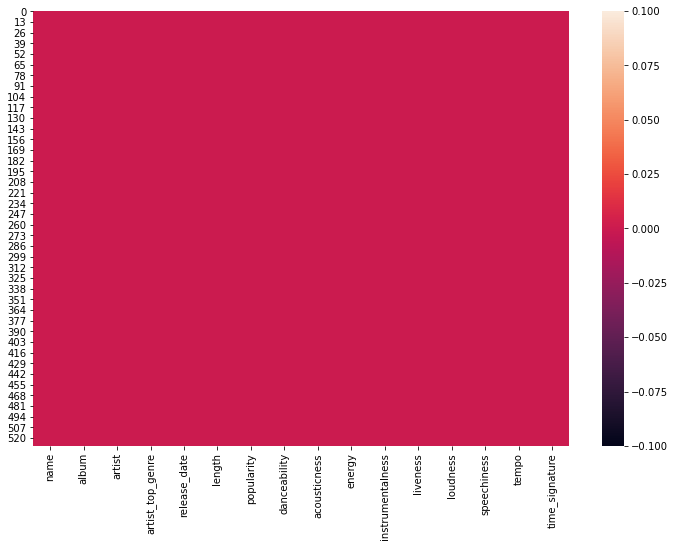

In [9]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(my_frame.isnull())

Text(0.5, 1.0, 'Top Genres')

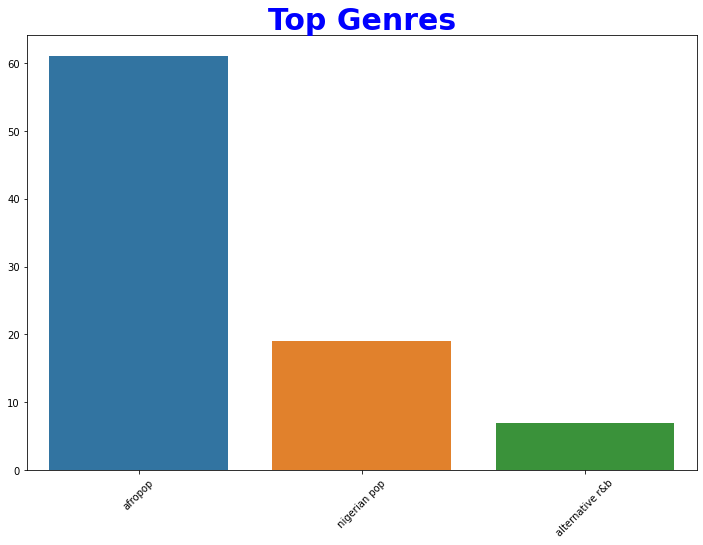

In [10]:
my_frame = my_frame[(my_frame['artist_top_genre'] == 'afropop') | (my_frame['artist_top_genre'] == 'alternative r&b') | 
                   (my_frame['artist_top_genre'] == 'nigerian pop')]
my_frame = my_frame[(my_frame['popularity'] > 0)]
top_value = my_frame['artist_top_genre'].value_counts()
fig = plt.figure(figsize = (12, 8))
sns.barplot(x = top_value.index, y = top_value.values)
plt.xticks(rotation = 45)
plt.title('Top Genres', color = 'blue', fontsize = 30, fontweight = 'bold')

## Apply Standard Scaler..

### Choose several columns with similar ranges. Make sure to include the artist_top_genre column to keep our genres straight.

In [11]:
lb_en = LabelEncoder()
x = my_frame.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]
y = my_frame['artist_top_genre']
x['artist_top_genre'] = lb_en.fit_transform(x['artist_top_genre'])
y = lb_en.transform(y)

## Apply KMeans Algorithm on Dataset..

In [12]:
km_model = KMeans(n_clusters = 3, random_state = 0)
km_model.fit(x)

# Predict the cluster for each data point..
y_pred_kmeans = km_model.predict(x)
y_pred_kmeans

array([2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0,
       0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0])

## Our model is in middle accuracy..

In [13]:
from sklearn import metrics
score = metrics.silhouette_score(x, y_pred_kmeans)
score

0.5537665042533775

## Build a model..

In [14]:
wcss_array = []

for i in range(1, 11):
    kmeans_model = KMeans(n_clusters = i, init = 'k-means++', random_state = 35)
    kmeans_model.fit(x)
    wcss_array.append(kmeans_model.inertia_)

G:\MyPython3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Create Elbow Method..

### Use that model to decide, using the Elbow Method, the best number of clusters to build..

G:\MyPython3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


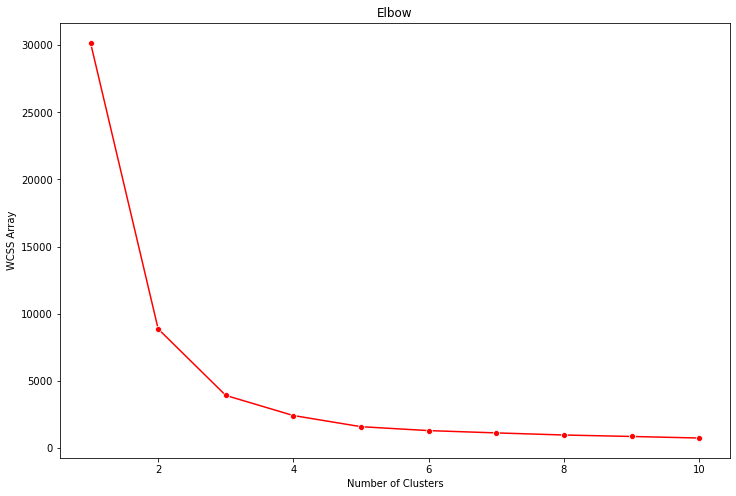

In [16]:
fig = plt.figure(figsize = (12, 8))
sns.lineplot(range(1, 11), wcss_array, marker = 'o', color = 'red')
plt.title('Elbow')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Array')
plt.show()

## Fit the model and create a scatterplot of the clusters..

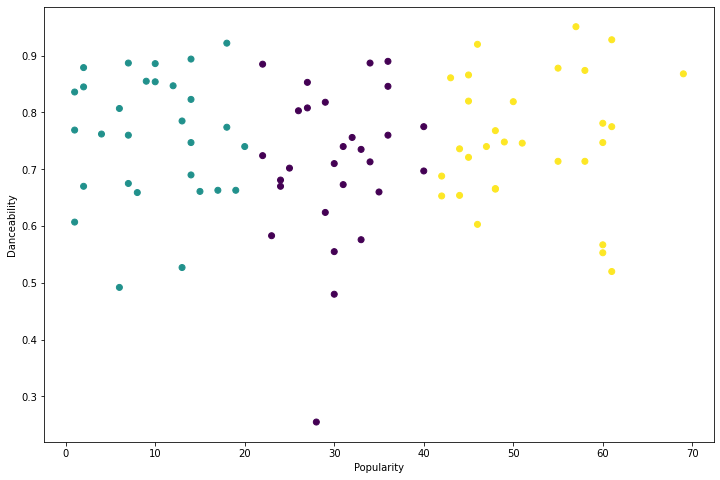

In [17]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(x)
km_y_pred = kmeans_model.predict(x)
fig = plt.figure(figsize = (12, 8))
plt.scatter(my_frame['popularity'], my_frame['danceability'], c = km_y_pred)
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.show()

# THE END..